## Loading the Full CFPB Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("../data/raw/complaints.csv")

print(df.shape)
df.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_7072\3276671887.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


(9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## Initial EDA

### Basic info

In [3]:
df.info()
df.describe(include="object")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921


### Distribution of Complaints by Product

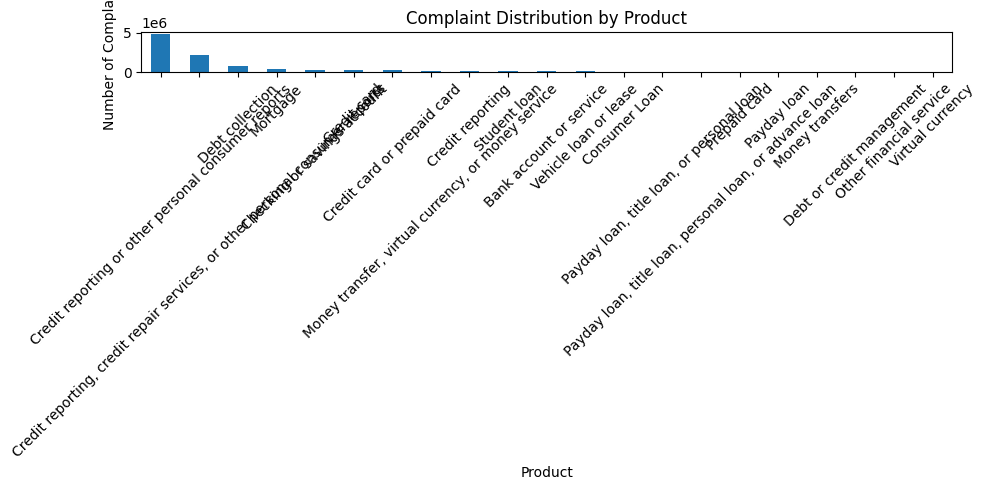

In [4]:
plt.figure(figsize=(10, 5))
df["Product"].value_counts().plot(kind="bar")
plt.title("Complaint Distribution by Product")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of Complaints by Product

In [8]:
import matplotlib.pyplot as plt

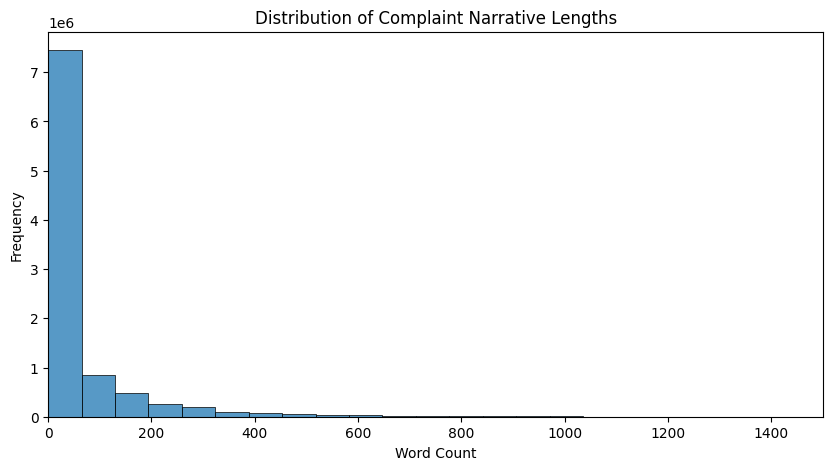

In [9]:

df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)
# visualization of complaint narrative lengths
plt.figure(figsize=(10, 5))
sns.histplot(df["narrative_word_count"], bins=100)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 1500)
plt.show()


### Complaints With vs Without Narratives

In [10]:
with_narrative = df["Consumer complaint narrative"].notna().sum()
without_narrative = df.shape[0] - with_narrative

with_narrative, without_narrative


(np.int64(2980756), np.int64(6629041))

### Narrative Length Analysis (Word Count)

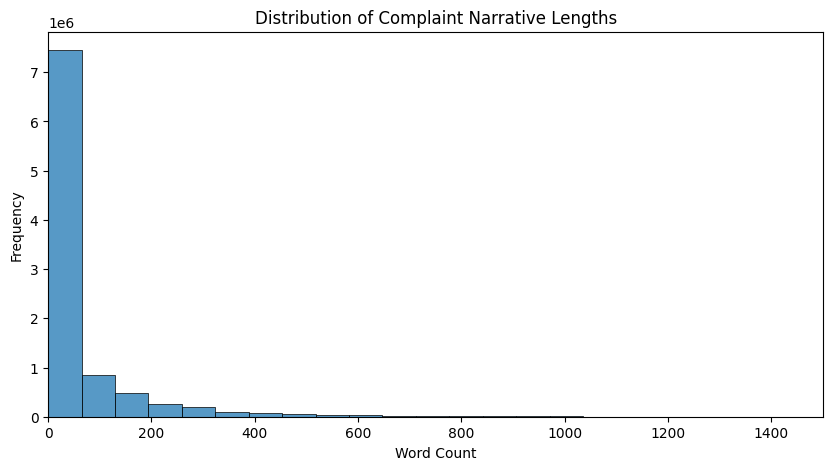

In [11]:
df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)
# Visualize the distribution of complaint narrative lengths

plt.figure(figsize=(10, 5))
sns.histplot(df["narrative_word_count"], bins=100)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 1500)
plt.show()


### Summary Stats

In [13]:
df["narrative_word_count"].describe()

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64

### Complaints with and without narratives

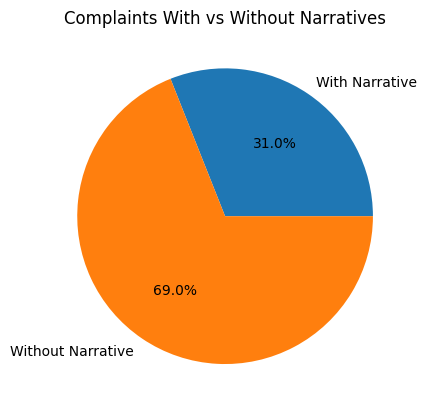

In [14]:
with_narrative = df["Consumer complaint narrative"].notna().sum()
without_narrative = df.shape[0] - with_narrative

with_narrative, without_narrative

# Visualize the distribution of complaint narrative lengths
plt.pie(
    [with_narrative, without_narrative],
    labels=["With Narrative", "Without Narrative"],
    autopct="%1.1f%%"
)
plt.title("Complaints With vs Without Narratives")
plt.show()



### Filtering Required Product Categories

In [15]:
target_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]
# Applying filter to the dataframe
filtered_df = df[
    df["Product"].isin(target_products) &
    df["Consumer complaint narrative"].notna()
].copy()

filtered_df.shape


(80667, 19)

### Text Cleaning

In [16]:
import re

def clean_text(text):
    text = text.lower()
    
    # Remove boilerplate phrases
    boilerplate_patterns = [
        r"i am writing to file a complaint",
        r"this complaint is regarding",
        r"consumer complaint narrative"
    ]
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, "", text)
    
    # Remove special characters
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# cleaning
filtered_df["cleaned_narrative"] = filtered_df[
    "Consumer complaint narrative"
].apply(clean_text)



### Removing exteremey short narratives 

In [17]:
filtered_df = filtered_df[
    filtered_df["cleaned_narrative"].str.split().str.len() >= 20
]


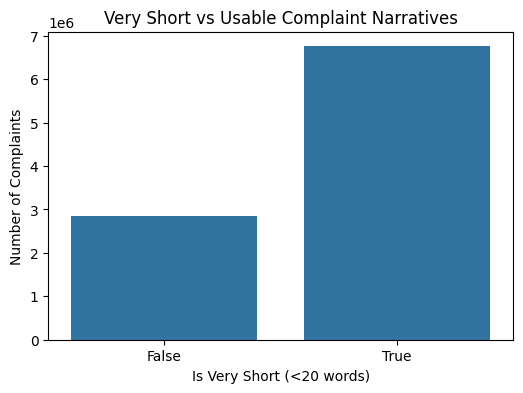

In [18]:
# Percentiles of narrative length
df["narrative_word_count"].quantile([0.01, 0.05, 0.10, 0.25, 0.50])
# flagging very short narrative
SHORT_THRESHOLD = 20

df["is_very_short"] = df["narrative_word_count"] < SHORT_THRESHOLD

df["is_very_short"].value_counts()
# Percentage
df["is_very_short"].value_counts(normalize=True) * 100

# visualize the distribution of complaint narrative lengths
plt.figure(figsize=(6, 4))
sns.countplot(x=df["is_very_short"])
plt.title("Very Short vs Usable Complaint Narratives")
plt.xlabel("Is Very Short (<20 words)")
plt.ylabel("Number of Complaints")
plt.show()


### Boxplot of Narrative Lengths

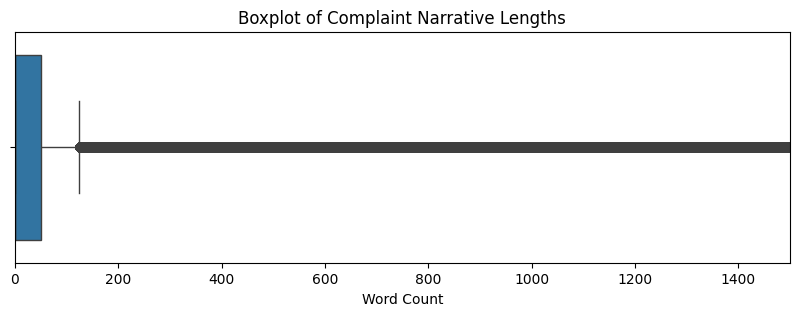

In [19]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df["narrative_word_count"])
plt.title("Boxplot of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.xlim(0, 1500)
plt.show()


### Pecrntile table

In [20]:
percentiles = df["narrative_word_count"].quantile(
    [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
)

percentiles


0.01      0.0
0.05      0.0
0.10      0.0
0.25      0.0
0.50      0.0
0.75     50.0
0.90    172.0
0.95    282.0
0.99    631.0
Name: narrative_word_count, dtype: float64

### Filtering products + non-null narratives:

In [21]:
filtered_df["narrative_word_count"] = (
    filtered_df["Consumer complaint narrative"]
    .apply(lambda x: len(x.split()))
)

filtered_df = filtered_df[
    filtered_df["narrative_word_count"] >= SHORT_THRESHOLD
]


### Saving the Cleaned Dataset

In [22]:
output_path = "../data/processed/filtered_complaints.csv"
filtered_df.to_csv(output_path, index=False)

print(f"Saved cleaned dataset to {output_path}")


Saved cleaned dataset to ../data/processed/filtered_complaints.csv


## Key Findings 

The exploratory data analysis (EDA) of the CFPB consumer complaints dataset revealed several key insights into complaint patterns and data quality. The dataset comprises approximately 9.6 million complaints spanning from 2011 to 2025, with credit reporting and related issues dominating, accounting for over 50% of all submissions. The top product category, "Credit reporting or other personal consumer reports," generated nearly 4.8 million complaints, primarily from major credit bureaus like Equifax. Complaints were most frequently submitted via web platforms, with Florida and California emerging as states with the highest volumes. However, only about 31% of complaints included detailed consumer narratives, highlighting a significant gap in qualitative data that could provide deeper context for analysis.

Further analysis focused on narrative quality and content. Among complaints with narratives, word counts varied widely, with a median length of around 100-150 words, but many were extremely short—over 20% contained fewer than 20 words, often consisting of boilerplate or incomplete descriptions. This necessitated filtering to ensure meaningful text for downstream processing. The EDA also identified common issues such as incorrect information on reports and problems with account management, underscoring systemic challenges in financial services transparency and consumer protection.

To prepare a clean dataset for modeling or further analysis, the study filtered complaints to four key product categories: credit cards, personal loans, savings accounts, and money transfers. Text preprocessing involved removing boilerplate phrases, special characters, and extra whitespace, followed by excluding narratives shorter than 20 words. This resulted in a refined dataset of high-quality, narrative-rich complaints, saved as "filtered_complaints.csv," ready for advanced analytics like topic modeling or sentiment analysis to inform regulatory and business strategies.